### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Reading Dataset**

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hv1rDwO_JaFwM78bJTa2CwIYagFoI7ODh4qYkQvPSbEp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'custommodeldeployment-donotdelete-pr-y07m9otvbaco72'
object_key = 'Liver_Disease_Patient_Records.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### **Exploring Data Analysis** 

In [5]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### **Checking For Null Values**

In [8]:
data.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
data.mode()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60.0,Male,0.8,0.2,198,25.0,23.0,7.0,3.0,1.0,1.0
1,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,298,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [12]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [13]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']=0.95

In [14]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### **Data Visualization**

### **Univariate** **Analysis** 

In [15]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

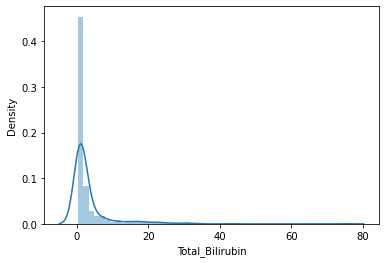

In [16]:
sns.distplot(data["Total_Bilirubin"])

<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Count'>

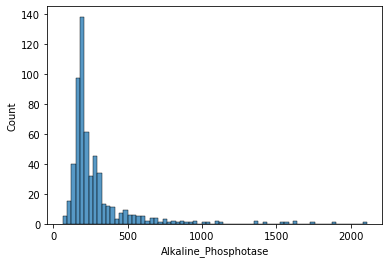

In [17]:
sns.histplot(data["Alkaline_Phosphotase"])

### **Bivariate Analysis**

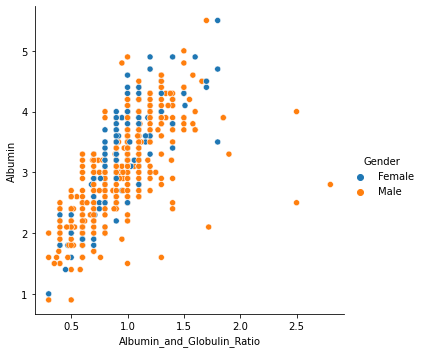

In [18]:
sns.relplot(x="Albumin_and_Globulin_Ratio",y="Albumin",data=data,hue="Gender")

### **Multi - Variate Analysis**

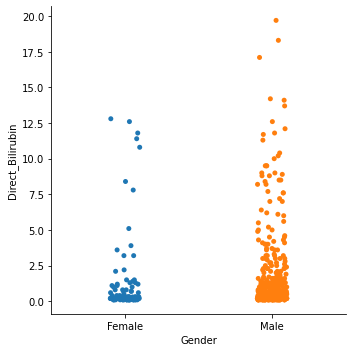

In [19]:
sns.catplot(x="Gender",y="Direct_Bilirubin",data=data)

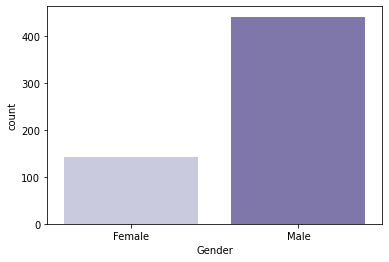

In [20]:
sns.countplot(data.Gender,palette='Purples')
plt.show() 

Text(0, 0.5, 'Age')

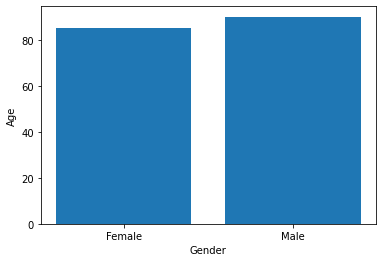

In [21]:
plt.bar(data.Gender,data.Age)
plt.xlabel('Gender')
plt.ylabel('Age')

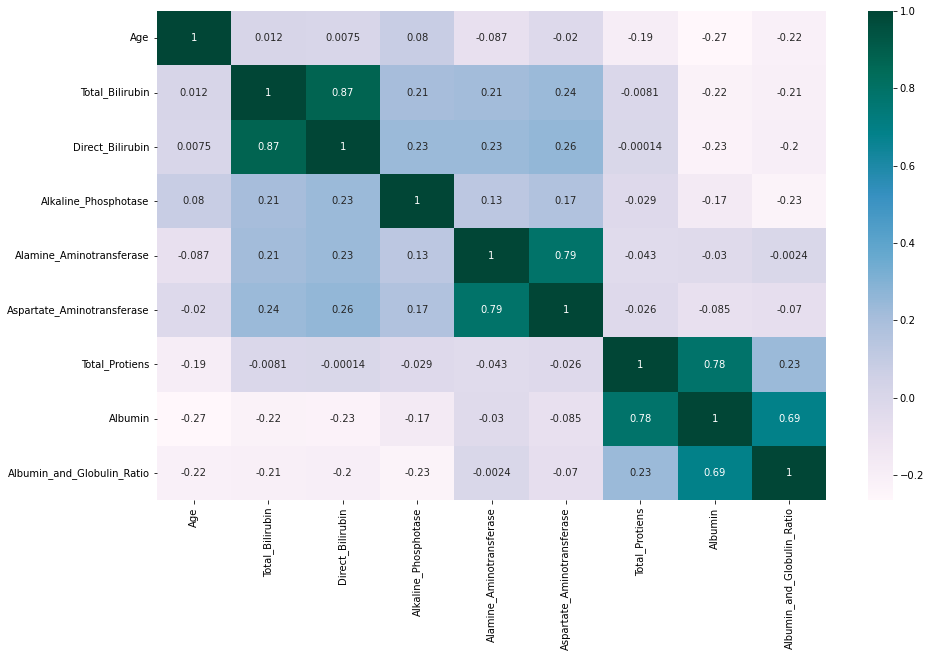

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(data.drop('Dataset',axis=1).corr(),annot=True,cmap='PuBuGn')
plt.show()

Liver Disease 416
Non Liver Disease 167


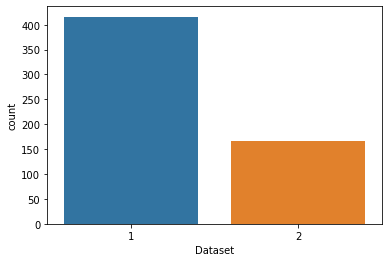

In [23]:
sns.countplot(data=data,x='Dataset')
LD,NLD=data['Dataset'].value_counts()
print("Liver Disease",LD)
print("Non Liver Disease",NLD)
plt.show() 

In [24]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [25]:
data.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [26]:
data["Gender"].replace({"Female":1,"Male":0},inplace = True)

### **Splitting The Dataset Into Dependent And Independent Variable**

In [27]:
x=data.iloc[:,0:-1]
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [28]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

### **Split The Dependent And Independent Features Into Train Set And Test Set**

In [29]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 75.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lale 0.6.10 requires scikit-learn<=1.0.2, but you have scikit-learn 1.1.3 which is incompatible.
autoai-ts-libs 1.1.9 requires scikit-learn<1.1,>=1.0.2; python_version >= "3.9", but you have scikit-learn 1.1.3 which is incompatible.
autoai-libs 1.13.6 requires scikit-learn<1.1,>=0.20.3

In [30]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [32]:
xtrain.shape

(466, 10)

In [33]:
xtest.shape

(117, 10)

### **Model Evaluation**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **Support Vector Machine Mode**

In [35]:
svm= SVC()

In [36]:
svm.fit(xtrain, ytrain)

SVC()

In [37]:
svmpred = svm.predict(xtest)

In [38]:
svmaccuracy = accuracy_score(svmpred,ytest)
svmaccuracy

0.6324786324786325

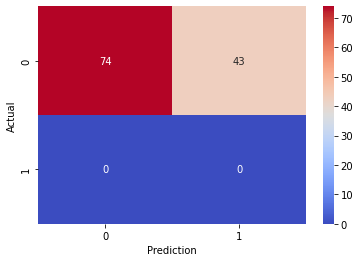

In [39]:
cf=confusion_matrix(svmpred,ytest)
sns.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

## **Random** **Forest** **Classifier**

In [40]:
rf=RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [41]:
rfpred = rf.predict(xtest)

In [42]:
rfaccuracy = accuracy_score(rfpred,ytest)
rfaccuracy

0.6410256410256411

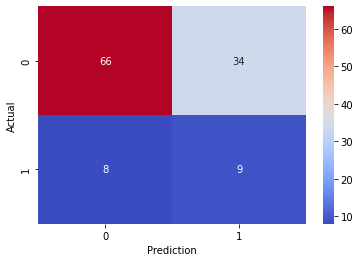

In [43]:
cf=confusion_matrix(rfpred,ytest)
sns.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

## **KNeighborsClassifier**

In [44]:
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [45]:
knnpred = knn.predict(xtest)
knnaccuracy = accuracy_score(knnpred,ytest)
knnaccuracy

0.6153846153846154

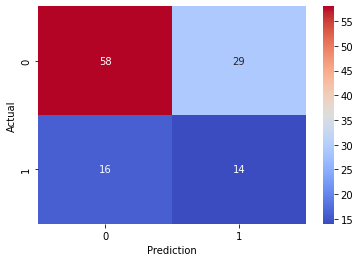

In [46]:
cf=confusion_matrix(knnpred,ytest)
sns.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

### **Save The Model**

In [47]:
import pickle
pickle.dump(svm, open('liver_analysis.pkl','wb'))

In [48]:
!pip install ibm_watson_machine_learning

In [49]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"_XT1d_peQfPvfbZ0Zv-DtDb5CsD_kQ9YuZHoVCKGt23N"
}
wml_client=APIClient(wml_credentials)

In [50]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
--  ----  -------
ID  NAME  CREATED
--  ----  -------


In [51]:
space_id="029a2b75-219c-4639-8405-8eabed7aa79c"

In [52]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [53]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [55]:
model_name="models"
deployment_name="demo_deploy"

In [56]:
model=svm

In [57]:
software_spec_uid= wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [58]:
model_props={
    wml_client.repository.ModelMetaNames.NAME: model_name,
    wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [59]:
model_details= wml_client.repository.store_model(
    model=model,
    meta_props=model_props,
    training_data=xtrain,
    training_target=ytrain
)
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'Age', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'int64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'int64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'int64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T14:02:46.606Z',
  'id': '591e3ac4-54b6-41c2-a7cf-139a64d80b48',
  'modified_at': '2022-11-18T14:02:49.129Z',
  'name': 'mod